# Cluster Validity
Many examples taken from sklearn's documentation and manipulated to run as in-class examples.

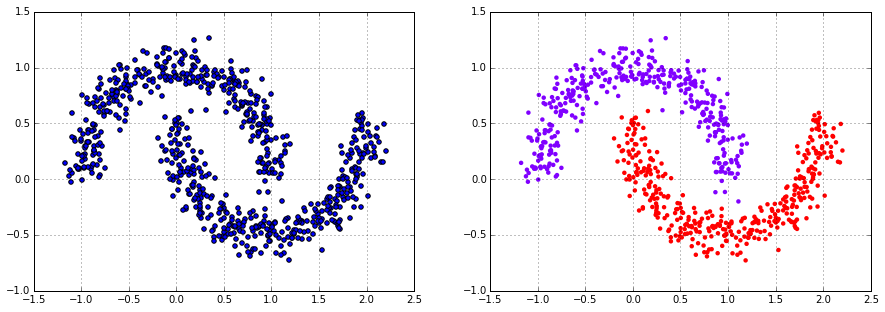

In [2]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

%matplotlib inline

# Generate sample data 
data, labels_true = make_moons(n_samples=750, noise=0.1)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(data[:, 0], data[:, 1], s=20)
plt.grid()
plt.subplot(1,2,2)
plt.scatter(data[:, 0], data[:, 1], c=labels_true,
                    cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.grid()
plt.show()

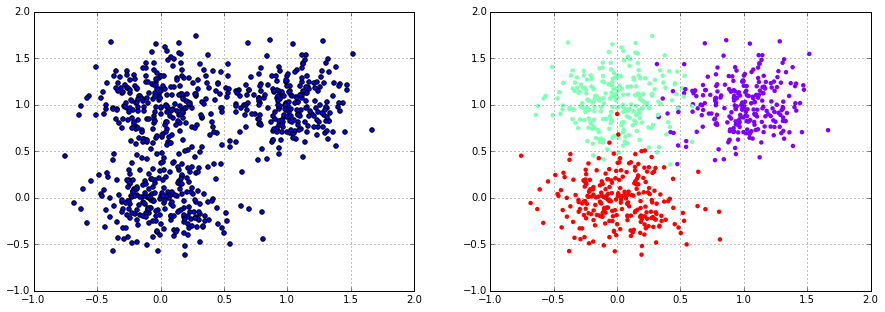

In [3]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

# Generate sample data with labels
centers = [[1, 1], [0, 1], [0,0]]
data, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.25)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(data[:, 0], data[:, 1], s=20)
plt.grid()
plt.subplot(1,2,2)
plt.scatter(data[:, 0], data[:, 1], c=labels_true,
                    cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.grid()
plt.show()

Estimated number of clusters: 1
Homogeneity: 0.004
Completeness: 0.022
V-measure: 0.007
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.003
Silhouette Coefficient: 0.181


/Library/Python/2.7/site-packages/numpy/core/fromnumeric.py:2499: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


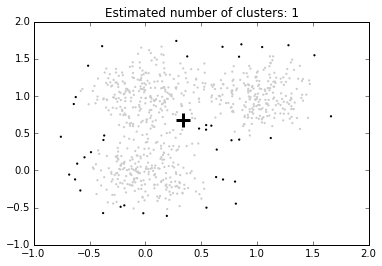

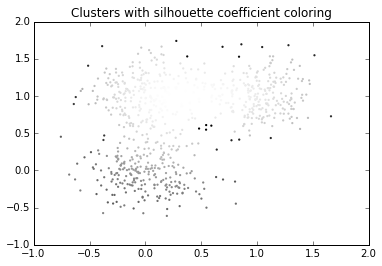

In [4]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np

n_clusters = 2
model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=1).fit(data)
# model = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters).fit(data)
model = DBSCAN(eps=0.15, min_samples=10).fit(data)

labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))

silhouette_per_sample = metrics.silhouette_samples(data,labels)

# get the middle of each cluster
centroids = []
for lab in range(0,n_clusters_):
    centroids.append( [np.mean(data[np.where(labels==lab),0]), np.mean(data[np.where(labels==lab),1])] )
centroids = np.array(centroids)

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels,
                    cmap=plt.cm.spectral, s=5, linewidths=0)

if len(centroids)>0:
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='+', s=200, linewidths=3, color='k', zorder=10)  # plot the centroids
plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=silhouette_per_sample,
                cmap=plt.cm.gray, s=5, linewidths=0)
plt.title('Clusters with silhouette coefficient coloring')
plt.show()

CPU times: user 8.6 ms, sys: 1.52 ms, total: 10.1 ms
Wall time: 11.2 ms


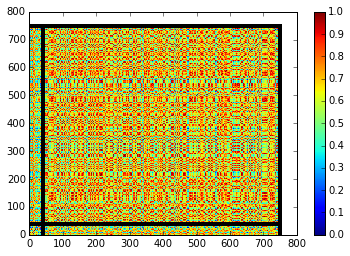

In [5]:
# plot the similarity matrix
from sklearn.metrics import pairwise

y=labels
idx_sorted = np.argsort(y,kind="quicksort")  # need to get the ordering of Y
data_sorted = data[idx_sorted]  # sort the dataset by class
%time R = pairwise.euclidean_distances(data_sorted)  # calculate the similarity

#transform distance to similarity
min_r = np.min(R)
max_r = np.max(R)
R = 1-(R-min_r)/(max_r-min_r)

# plt.figure(figsize=(20,10))
plt.pcolormesh(R)
plt.colorbar()

# plot class boundaries
bounds = np.cumsum([np.sum(y==val) for val in np.unique(y)])
for b in bounds:
    plt.plot([b,b],[0, len(y)],'k',linewidth=4)
    plt.plot([0, len(y)],[b,b],'k',linewidth=4)

plt.show()

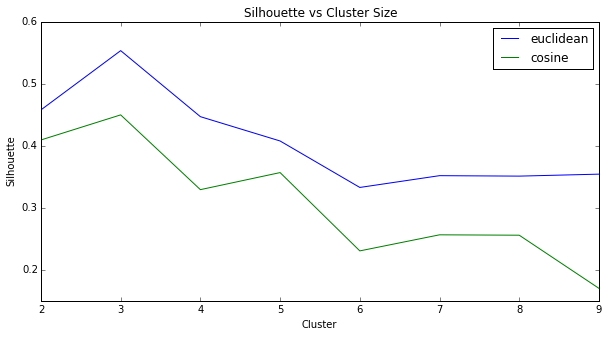

In [6]:
# do it for the k-means
from sklearn.cluster import KMeans

seuclid = []
scosine = []
k = range(2,10)
for i in k:
    kmeans_model = KMeans(n_clusters=i, init="k-means++").fit(data)
    labels = kmeans_model.labels_
    seuclid.append(metrics.silhouette_score(data, labels, metric='euclidean'))
    scosine.append(metrics.silhouette_score(data, labels, metric='cosine'))
    
plt.figure(figsize=(10,5))
plt.plot(k,seuclid,label='euclidean')
plt.plot(k,scosine,label='cosine')
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
plt.legend()
plt.show()

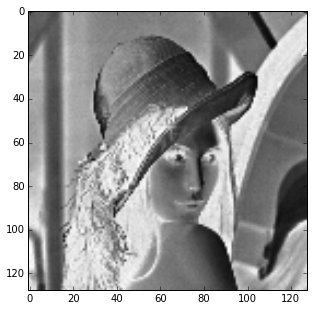

In [7]:
import scipy as sp

# Generate data
lena = sp.misc.lena()
lena = -lena + 255
# Get Different Patches of the image
lena_patches = []
for i in range(4):
    for j in range(4):
        lena_patches.append(lena[i::4, j::4]) 

lena = lena_patches[0]

plt.figure(figsize=(5, 5))
plt.imshow(lena, cmap=plt.cm.gray)

(16384, 16)
Number of pixels:  16384
Number of clusters:  10


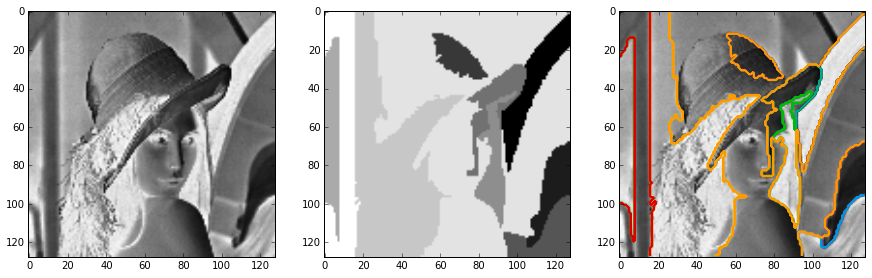

In [8]:

from sklearn.feature_extraction.image import grid_to_graph

for i in range(len(lena_patches)):
    lena_patches[i] = np.reshape(lena_patches[i], (-1, 1))

X = np.concatenate(lena_patches, axis =1)
print X.shape
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph( lena.shape[0], lena.shape[1] )


# Compute clustering
n_clusters = 10  # number of regions
model = AgglomerativeClustering(linkage='ward',
                                connectivity=connectivity,
                                n_clusters=n_clusters)
# model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=5)
model.fit(X)

label = np.reshape(model.labels_, lena.shape)
print "Number of pixels: ", label.size
print "Number of clusters: ", np.unique(label).size

# Plot the results on an image
plt.figure(figsize=(15, 5))
try:
    values = model.cluster_centers_.squeeze()
    lena_compressed = np.choose(model.labels_, values)
    lena_compressed.shape = lena.shape
    plt.subplot(1,3,2)
    plt.imshow(lena_compressed, cmap=plt.cm.gray)
except:
    plt.subplot(1,3,2)
    plt.imshow(label, cmap=plt.cm.gray)


plt.subplot(1,3,1)
plt.imshow(lena, cmap=plt.cm.gray)
# ss = 'Silhouette Score: {0}'.format(metrics.silhouette_score(X, model.labels_))
# plt.title(ss)

plt.subplot(1,3,3)
plt.imshow(lena, cmap=plt.cm.gray)
for lab in range(n_clusters):
    plt.contour(label == lab, contours=1,
               colors=[plt.cm.spectral(lab / float(n_clusters))])
plt.show()